# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**RR12-Machine-Learning**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load our train and test data into data frames
train_data = pd.read_csv('data/df_train.csv',index_col=0)
test_data = pd.read_csv('data/df_test.csv',index_col=0)

print(f'Shape of train data: {train_data.shape}')
print(f'Shape of test data: {test_data.shape}')

Shape of train data: (8763, 48)
Shape of test data: (2920, 47)


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# view our dataset
train_data.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


In [4]:
# check number of null values in our Valencia_pressure column
print(train_data.isnull().sum())
print('\n')
print(test_data.isnull().sum())

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

We have 2068 missing value in the Valencia_pressure column in the train dataset and 454 missing values in the same column in the test dataset.

In [5]:
# view column statistics
train_data.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [6]:
# view info on our dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [7]:
# changing the datatype of the time column to datetime
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

## Checking for the Presence of Outliers with Kurtosis

In [8]:
train_data.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

Features with kurtosis values above 3 indicate the presence of outliers. From the above plot we can see that Valencia_wind_speed, Bilbao_rain_1h,Barcelona_rain_1h,Seville_rain_1h, Madrid_rain_1h, Valencia_snow_3h  all contain outliers.

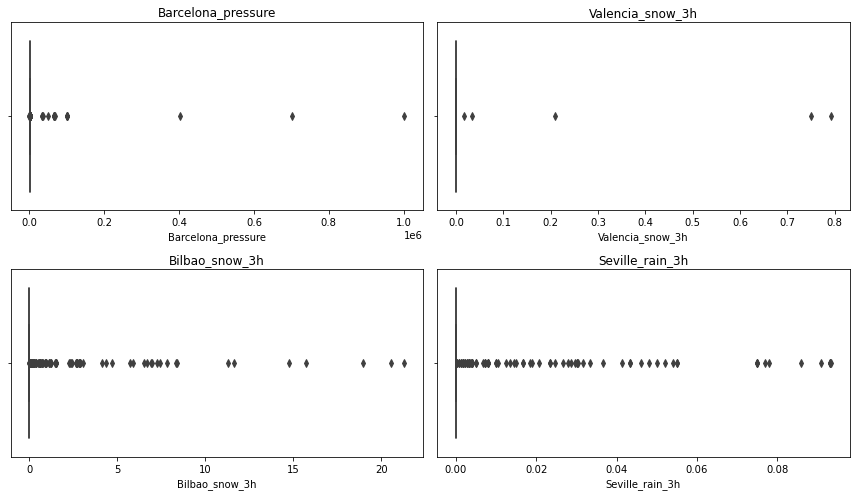

In [9]:
# using a box plot to visualize outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
sns.boxplot(x='Barcelona_pressure',data=train_data,ax=axes[0,0])
axes[0,0].set_title('Barcelona_pressure')
sns.boxplot(x='Valencia_snow_3h',data=train_data,ax=axes[0,1])
axes[0,1].set_title('Valencia_snow_3h')
sns.boxplot(x='Bilbao_snow_3h',data=train_data,ax=axes[1,0])
axes[1,0].set_title('Bilbao_snow_3h')
sns.boxplot(x='Seville_rain_3h',data=train_data,ax=axes[1,1])
axes[1,1].set_title('Seville_rain_3h')
plt.tight_layout();

We can see from the plots that Bilboa_snow_3h and Seville_rain_3h contain a large number of outliers.

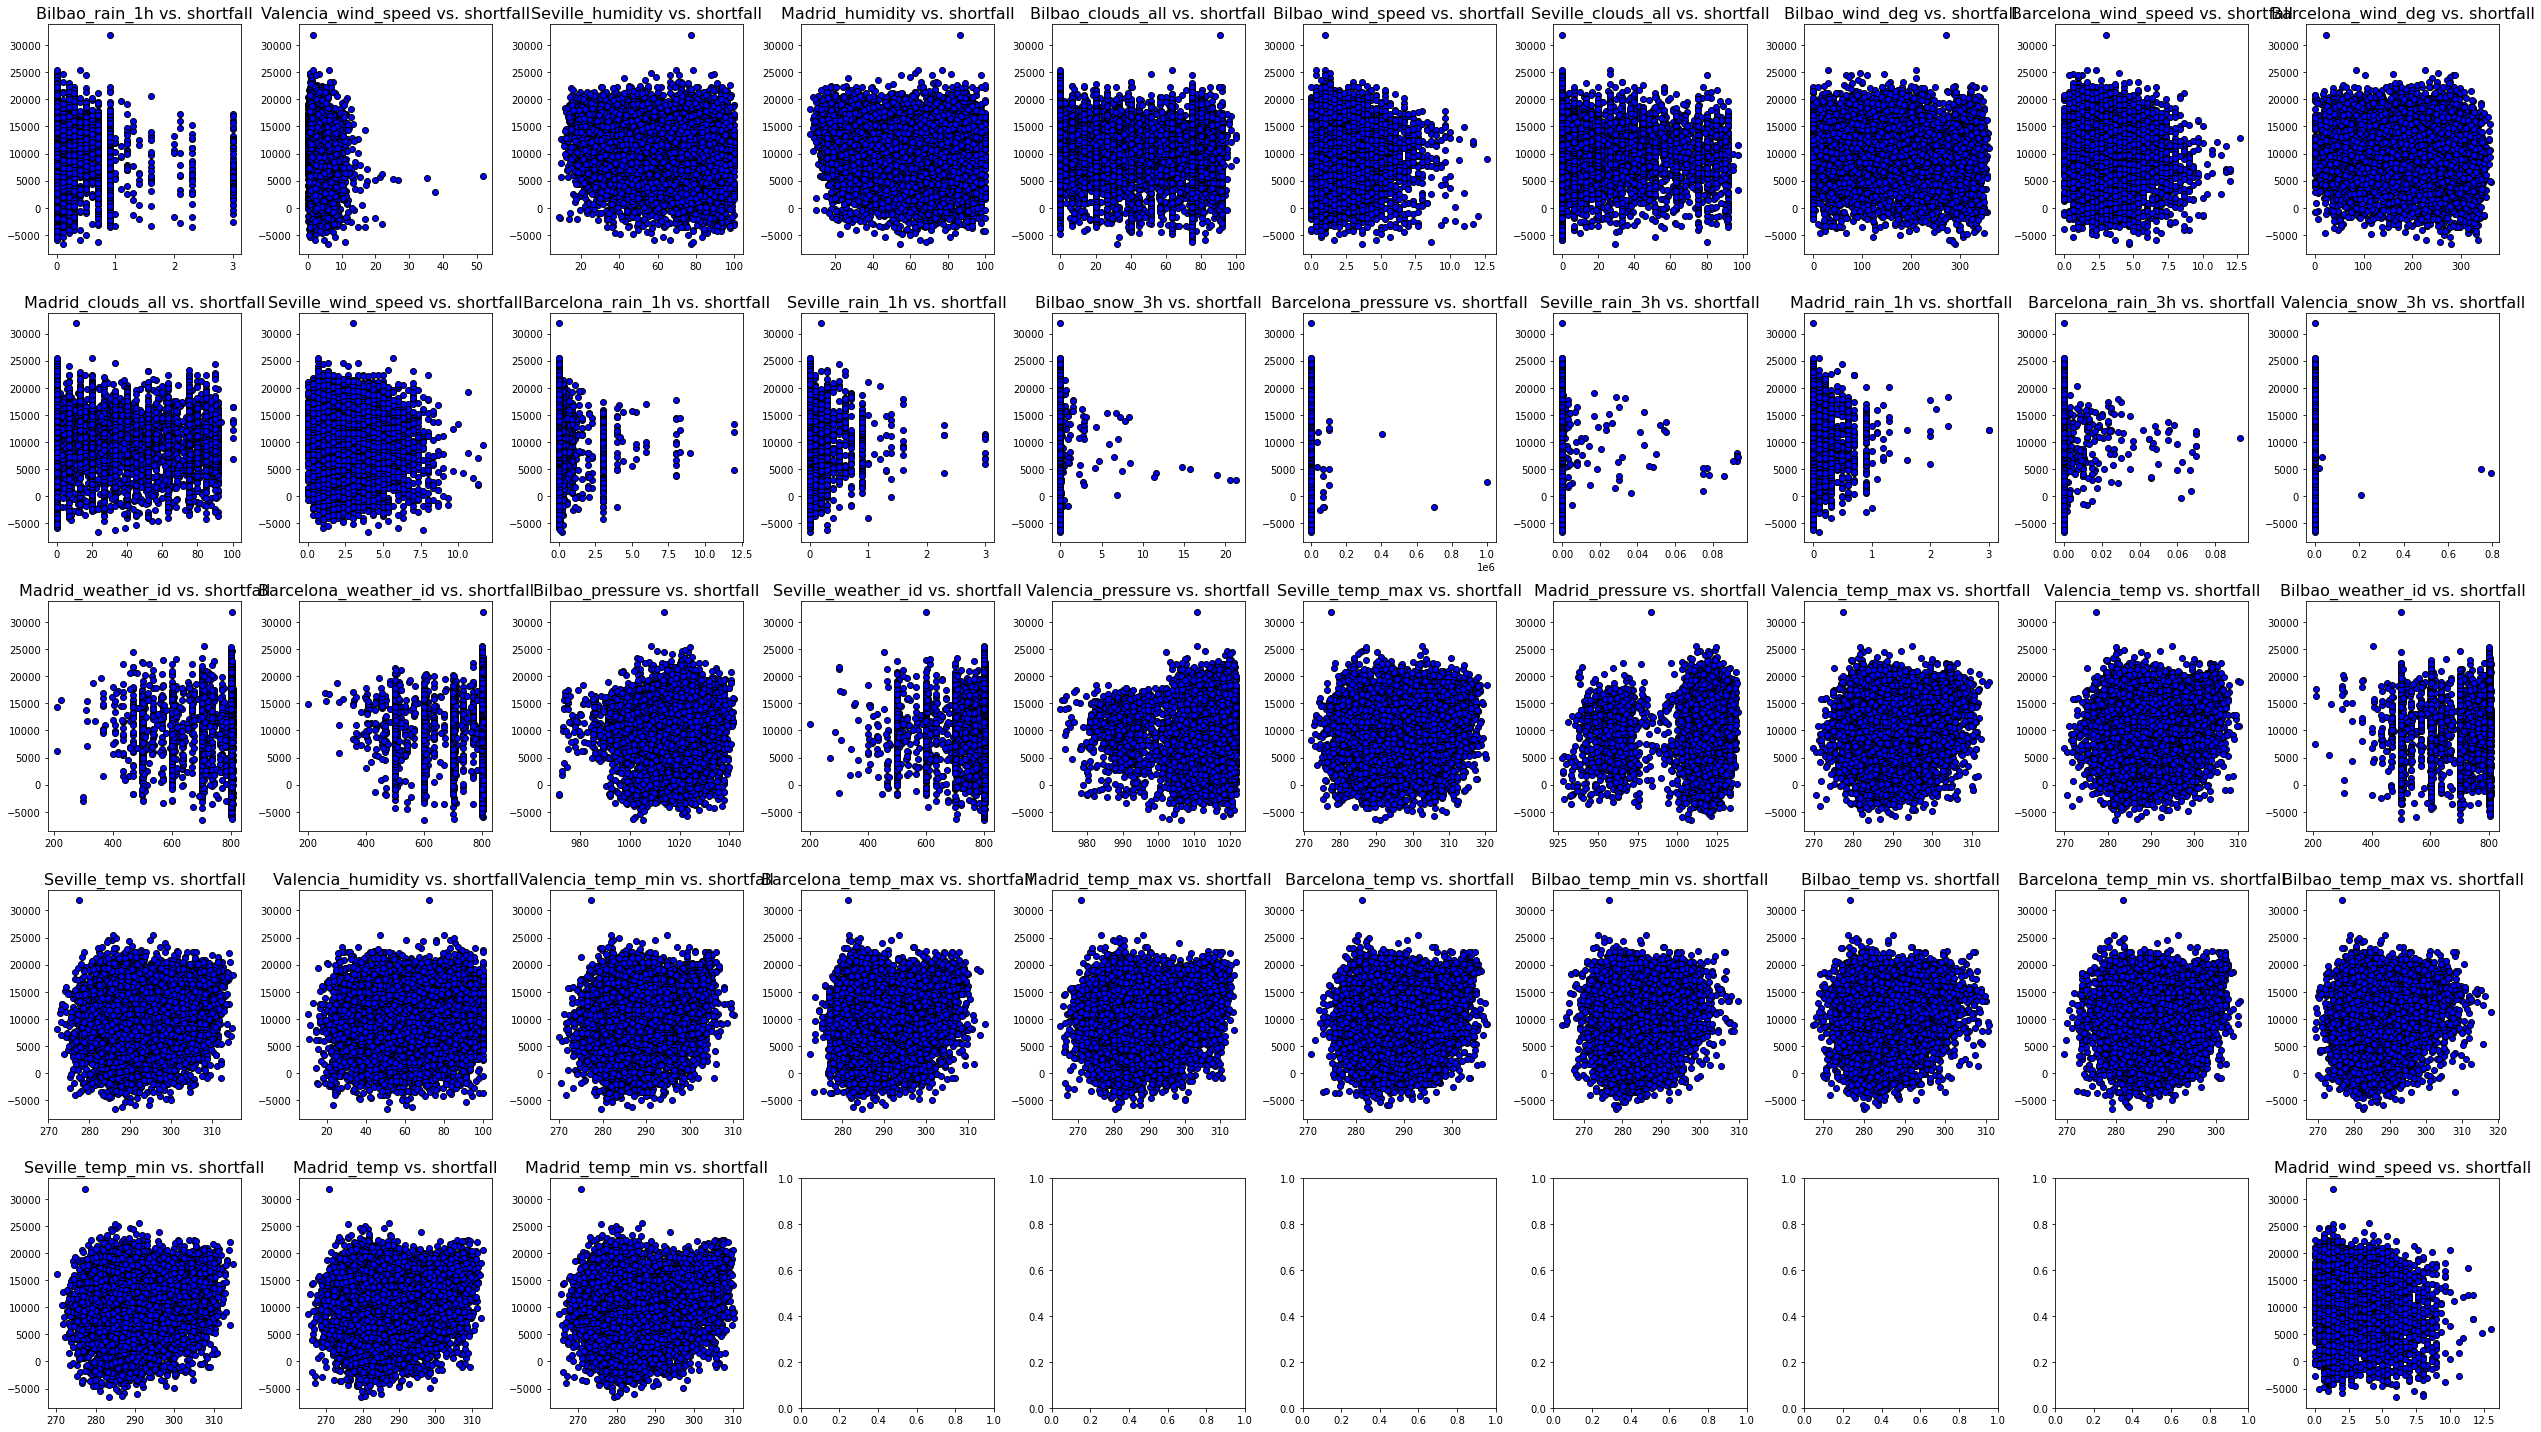

In [10]:
# checking for a linear relationship with predictors and our target variable
numeric_cols = train_data.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('load_shortfall_3h')

fig, axs = plt.subplots(5,10, figsize=(35,20),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(numeric_cols):
    axs[index-1].set_title("{} vs. shortfall".format(column),fontsize=16)
    axs[index-1].scatter(x=train_data[column],y=train_data['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout()

It appears none of our predictors have a linear relationship with our label.

## Viewing the Distribution of our Target Variable

NumExpr defaulting to 8 threads.


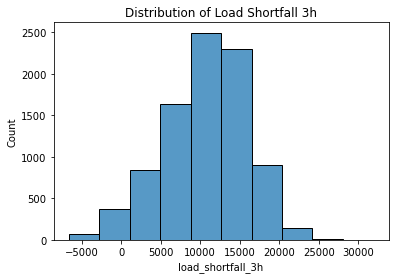

In [11]:
# plotting a histogram of our target variable
sns.histplot(data=train_data, x='load_shortfall_3h',bins=10)
plt.title('Distribution of Load Shortfall 3h');

We can see that our target variable has a normal distribution.

Our target variable has a relatively normal distrubution.

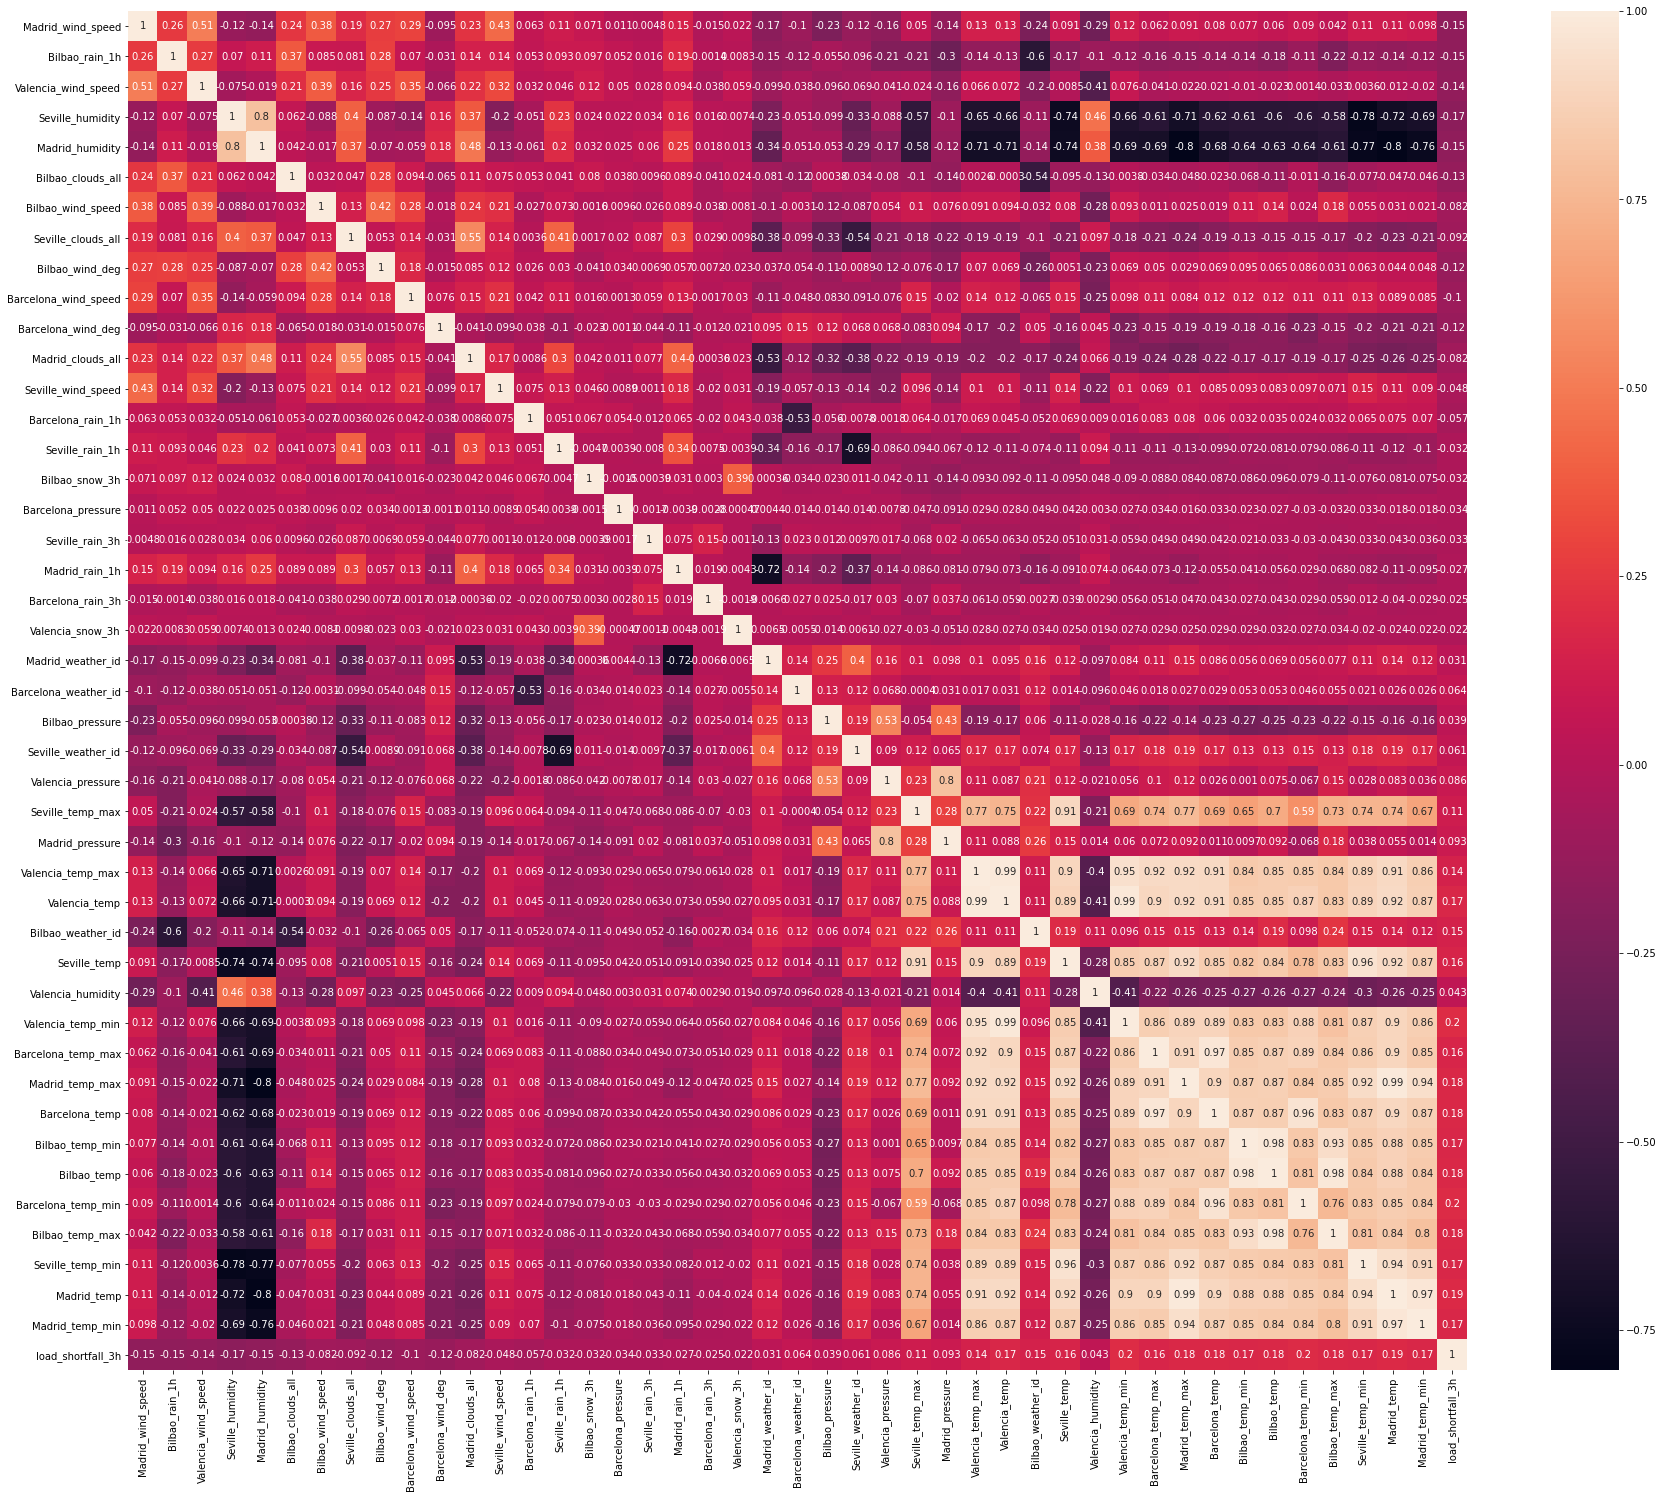

In [12]:
# plot a heatmap to show correlation between our numeric variables
fig = plt.figure(figsize=(30,25))

sns.heatmap(train_data.corr(),annot=True);

From the plot we can see that none of our features have a strong correlation with our target variable.

The above scatter plots show us a strong linear relationship doesn't exsist between our features and the target variable.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [13]:
# filling null values
mean_value_train = train_data['Valencia_pressure'].mean()
train_data['Valencia_pressure'].fillna(mean_value_train,inplace=True)

mean_value_test = test_data['Valencia_pressure'].mean()
test_data['Valencia_pressure'].fillna(mean_value_test,inplace=True)

In [14]:
# check our dataset for null values
train_data.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [16]:
# create new features
# extract year and month and other time values from our time column
train_data['year'] = train_data['time'].dt.year
test_data['year'] = test_data['time'].dt.year
train_data['month'] = train_data['time'].dt.month
test_data['month'] = test_data['time'].dt.month
test_data['day'] = test_data['time'].dt.day
train_data['day'] = train_data['time'].dt.day
test_data['hour'] = test_data['time'].dt.hour
train_data['hour'] = train_data['time'].dt.hour
test_data['minute'] = test_data['time'].dt.minute
train_data['minute'] = train_data['time'].dt.minute
test_data['second'] = test_data['time'].dt.second
train_data['second'] = train_data['time'].dt.second

In [17]:
# drop the time column
# store time values for test data in a separate database
test_time = test_data['time']
train_data = train_data.drop('time',axis=1)
test_data = test_data.drop('time',axis=1)
train_data.head(3)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,year,month,day,hour,minute,second
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,0,0
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,0,0
2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,214.333333,...,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,0,0


In [18]:
## convert categorical variables to numeric
# strip the numeric values from the column
train_data['Valencia_wind_deg'] = train_data.Valencia_wind_deg.apply(lambda x: x.split('_')[1])
test_data['Valencia_wind_deg'] = test_data.Valencia_wind_deg.apply(lambda x: x.split('_')[1])

# change the type to integer
train_data['Valencia_wind_deg'] = train_data['Valencia_wind_deg'].astype('int')
test_data['Valencia_wind_deg'] = test_data['Valencia_wind_deg'].astype('int')

In [19]:
train_data['Seville_pressure'] = train_data.Seville_pressure.str.strip('sp')
test_data['Seville_pressure'] = test_data.Seville_pressure.str.strip('sp')

# change datatype to integer
train_data['Seville_pressure'] = train_data['Seville_pressure'].astype('int')
test_data['Seville_pressure'] = test_data['Seville_pressure'].astype('int')

In [20]:
# split our data into features and label
X = train_data.drop('load_shortfall_3h',axis=1)
y = train_data['load_shortfall_3h'].astype('int')

## Feature Selection with SelectKbest

In [21]:
# find top k features
selector = SelectKBest(chi2, k=10)
fit = selector.fit(X,y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
featureScores = pd.concat([columns, scores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(10)

,Features,Score
37,Madrid_temp_max,2281.817118
44,Madrid_temp,2106.588763
45,Madrid_temp_min,2054.920443
28,Seville_temp_max,1847.097423
43,Seville_temp_min,1589.866015
33,Seville_temp,1483.057026
30,Valencia_temp_max,1365.685590
36,Barcelona_temp_max,1260.724182
31,Valencia_temp,1229.799250
42,Bilbao_temp_max,1223.770161


In [22]:
new_X = ['Madrid_temp_min','Seville_temp_max', 'Seville_temp_min', 'Seville_temp','Seville_temp','Valencia_temp_max',
         'Barcelona_temp_max','Valencia_temp','Bilbao_temp_max','Valencia_temp_min','Bilbao_temp']

We can see the ten most important features in the above table based on the selectkbest model, we will put this into consideration when doing our model training.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [23]:
# split data into train and validation
# Assume you have your data stored in X and y variables
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X Train shape: {X_train.shape}')
print(f'X Val shape: {X_val.shape}')
print(f'y Train shape: {y_train.shape}')
print(f'y Test shape: {y_val.shape}')

X Train shape: (7010, 52)
X Val shape: (1753, 52)
y Train shape: (7010,)
y Test shape: (1753,)


In [24]:
# normalize our numerical data
scaler = StandardScaler()

# fit and transform the data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# create a new dataframe with the scaled data
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)

# view our scaled data
X_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour,minute,second
0,0.305662,1.651420,0.427931,2.768101,-0.596398,-0.028566,0.967240,2.217028,-0.56378,1.612337,...,-0.448425,-1.002270,-0.555693,-0.588499,1.224352,-1.608234,0.027756,0.221903,0.0,0.0
1,-0.955592,-1.489803,-0.362807,0.168343,0.467530,0.136073,0.046383,-0.310308,-0.56378,-0.765265,...,-0.824919,-0.674828,-0.519860,-0.515809,1.224352,1.009233,1.731495,-0.214311,0.0,0.0
2,-0.234875,1.302395,0.164352,0.852490,0.984717,0.890668,0.752373,-0.504718,-0.56378,1.042364,...,-0.779866,-1.444358,-1.516427,-1.404484,-1.224701,-1.608234,-0.312992,1.530544,0.0,0.0
3,1.566916,0.953370,1.218669,0.305172,0.955163,-0.138326,1.018399,2.800259,-0.56378,1.560225,...,-0.875070,-0.746251,-0.471843,-0.512175,-0.000175,-1.026575,-1.562401,1.530544,0.0,0.0
4,1.566916,0.255321,-0.362807,0.578831,-0.374746,-0.659682,-0.311728,0.856155,-0.56378,0.719922,...,1.198733,0.389359,0.743632,0.610890,-1.224701,0.427574,-0.312992,-0.214311,0.0,0.0


In [25]:
## train our linear regression model
#instantiate model object
lr = LinearRegression()

In [26]:
# fit model with test data
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
# evaluate our linear regressor
lr_pred = lr.predict(X_val)
lr_mse = mean_squared_error(y_val, lr_pred)
lr_r2 = r2_score(y_val, lr_pred)
lr_mae = mean_absolute_error(y_val, lr_pred)

print("Mean Squared Error:", lr_mse)
print("R-squared score:", lr_r2)
print("Mean Absolute Error:", lr_mae)

Mean Squared Error: 23213860.403906517
R-squared score: 0.1757085396911846
Mean Absolute Error: 3833.7990675796796


In [28]:
# train a decision tree regressor
dtr = DecisionTreeRegressor()

In [29]:
# fit model and make prediction
dtr.fit(X_train, y_train)
tree_pred = dtr.predict(X_val)

In [30]:
# evaluate tree model
tree_mse = mean_squared_error(y_val, tree_pred)
tree_r2 = r2_score(y_val, tree_pred)
tree_mae = mean_absolute_error(y_val, tree_pred)

print("Mean Squared Error:", tree_mse)
print("R-squared score:", tree_r2)
print("Mean Absolute Error:", tree_mae)

Mean Squared Error: 20945387.59897319
R-squared score: 0.25625881131833095
Mean Absolute Error: 3484.972618368511


In [31]:
# train support vector model
svm = SVR()

In [32]:
# fit model and make predictions
svm.fit(X_train,y_train)

svm_pred = svm.predict(X_val)

In [33]:
# evaluate our svr model
svm_mse = mean_squared_error(y_val, svm_pred)
svm_r2 = r2_score(y_val, svm_pred)
svm_mae = mean_absolute_error(y_val, svm_pred)

print("Mean Squared Error:", svm_mse)
print("R-squared score:", svm_r2)
print("Mean Absolute Error:", svm_mae)

Mean Squared Error: 28005984.26982996
R-squared score: 0.005546976267721382
Mean Absolute Error: 4224.765069290537


In [34]:
# train a random forest regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# evaluate our model
rfr_pred = rfr.predict(X_val)
rfr_mse = mean_squared_error(y_val, rfr_pred)
rfr_r2 = r2_score(y_val, rfr_pred)
rfr_mae = mean_absolute_error(y_val, rfr_pred)

print("Mean Squared Error:", rfr_mse)
print("R-squared score:", rfr_r2)
print("Mean Absolute Error:", rfr_mae)

Mean Squared Error: 10399658.787388308
R-squared score: 0.6307227759874388
Mean Absolute Error: 2536.8719851682827


## Let's Attepmt Training our model with Selected Features

In [36]:
# create new train and validation data
X_train_new = X_train[new_X]
X_val_new = X_val[new_X]

In [37]:
# train a random forest regressor
rfr_new = RandomForestRegressor()
rfr_new.fit(X_train_new, y_train)

RandomForestRegressor()

In [38]:
# evaluate our model
rfr_new_pred = rfr.predict(X_val)
rfr_new_mse = mean_squared_error(y_val, rfr_new_pred)
rfr_new_r2 = r2_score(y_val, rfr_new_pred)
rfr_new_mae = mean_absolute_error(y_val, rfr_new_pred)

print("Mean Squared Error:", rfr_new_mse)
print("R-squared score:", rfr_new_r2)
print("Mean Absolute Error:", rfr_new_mae)

Mean Squared Error: 10399658.787388308
R-squared score: 0.6307227759874388
Mean Absolute Error: 2536.8719851682827


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

We will be comparing model performance based on the following metrics:
* R-squared score
* Mean Squared Error
* Mean Absolute Error

In [39]:
model_performance1 = {
                    'R2 Score':
                    {
                        'Linear Model': lr_r2,
                        'Decision Tree': tree_r2,
                        'Support Vector': svm_r2,
                        'Random Forest': rfr_r2
                    }
}
# create dataframe from dictionary
model_performance1 = pd.DataFrame(model_performance1)
model_performance1.sort_values(by='R2 Score',ascending=False)

,R2 Score
Random Forest,0.630723
Decision Tree,0.256259
Linear Model,0.175709
Support Vector,0.005547


In [40]:
model_performance2 = {
                    'Mean Squared Error':
                    {
                        'Linear Model': lr_mse,
                        'Decision Tree': tree_mse,
                        'Support Vector': svm_mse,
                        'Random Forest': rfr_mse
                    }
}
# create dataframe from dictionary
model_performance1 = pd.DataFrame(model_performance2)
model_performance1.sort_values(by='Mean Squared Error',ascending=True)

,Mean Squared Error
Random Forest,1.039966e+07
Decision Tree,2.094539e+07
Linear Model,2.321386e+07
Support Vector,2.800598e+07


In [41]:
model_performance3 = {
                    'Mean Absolute Error':
                    {
                        'Linear Model': lr_mae,
                        'Decision Tree': tree_mae,
                        'Support Vector': svm_mae,
                        'Random Forest': rfr_mae
                    }
}
# create dataframe from dictionary
model_performance1 = pd.DataFrame(model_performance3)
model_performance1.sort_values(by='Mean Absolute Error',ascending=True)

,Mean Absolute Error
Random Forest,2536.871985
Decision Tree,3484.972618
Linear Model,3833.799068
Support Vector,4224.765069


We are going to use the random forest regressor as our base model as it perfromed the best on all our metrics.

## Make Predictions on the Test Data Provided

In [42]:
test_data.head(3)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour,minute,second
8763,5.000000,8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.000000,193.333333,...,285.15,283.150000,279.866667,279.15,2018,1,1,0,0,0
8764,4.666667,8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.000000,143.333333,...,284.15,281.150000,279.193333,278.15,2018,1,1,3,0,0
8765,2.333333,7,0.0,5.000000,89.0,89.666667,0.0,2.333333,6.666667,130.000000,...,282.15,280.483333,276.340000,276.15,2018,1,1,6,0,0


In [43]:
# make predictions with our random forest model
predictions = rfr.predict(test_data)

In [44]:
merged_df = pd.DataFrame({'time':test_time, 'load_shortfall_3h':predictions})

In [45]:
merged_df.head()

,time,load_shortfall_3h
8763,2018-01-01 00:00:00,8831.97
8764,2018-01-01 03:00:00,13003.58
8765,2018-01-01 06:00:00,14070.10
8766,2018-01-01 09:00:00,13637.82
8767,2018-01-01 12:00:00,13386.37


In [46]:
# save predictions as a csv file
merged_df.to_csv('data/predixct.gz', index=False, compression='gzip')

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

Our team was tasked with building a machine learning model that can forecast Spain's three hourly energy shortfall between fossil fuel and renewable energy sources. We chose to use a random forest regressor as our best performing model.

Random forest is an ensemble learning algorithm that creates multiple decision trees and combines their predictions to arrive at a final prediction. Each tree is trained on a random subset of the training data and a random subset of the features, which helps to reduce overfitting and increase the accuracy of the model.

In our case, the random forest model takes in various weather features such as pressure, wind speed, and humidity as inputs and predicts the energy shortfall as the output. The model learns the relationships between the weather features and the energy shortfall by creating decision trees that split the data based on the values of the input features.

To make predictions, the random forest model averages the predictions of all the individual decision trees, resulting in a more accurate and robust final prediction.

To evaluate the accuracy of our model, we used various metrics such as mean absolute error and mean squared error. We also identified the most important features that contributed to the model's prediction decision by using feature importance scores.

Overall, the random forest model proved to be an effective tool for forecasting Spain's energy shortfall. Its ability to handle complex relationships between the input features and the output variable made it a reliable choice for this task.